### EXERCISE 10.1

In this exercise, as happens in exercise 9, it has been concentrated in implementing another optimization's algorithm. The choice, this time, has fallen on an algorithm of "simulated annealing", whose effectiveness was tested on the problem of the salesman traveler. With the scope of being able to make a comparison between this method and the gentic algorithm have been taken the same coordinates of the cities in the square.

In the analysis made has been plotted the best path and the squared-length of the best path as function of the steps.

### How does the simulated annealing work

As it has been done in exercise 6 and exercise 7, the reaserch of the best configuration of the path is headed by a metropolis algorithm. 

It has been considered the $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ norm of the path as the energy of a system and another parameter $(T)$ as a fictitious temperature. 

Starting from a random configuartion with high T, the algorithm can explore easily a lot of configurations. As the markov chain is built T has been decreased, and with it, the efficiency of the metropolis. The markov chain explores less and less configurations, avoiding those whose high energy and converging to those with a short legth. The final state sampled must be the lowest in energy: the ground state.

Given a configuration, the proposal of variation of the markov chain has been calculated as the ratio between the boltzamn weight of the new configuration and the boltzamn weight of the old one. To extract a new configuration has been called the Mutiation operator of the excercise 9: with 50% of probablity it can be called the invertion or the permutation of a piece of the path.

#### My code

In the c++ code has been made $1.8*10^6$ steps of metropolis and the length of the path has been taken every $10^4$ steps for a total of 180 measurements. Even the temperature has been decreased every $10^4$ steps, but the amount for which has been decreased depends by the istantaneus number of steps.

The annealing has been divided in three parts:

1)In the first part the temperature decrease for an amount of $dT=0.5$ in the interval $[27.005,2.005]$ and are used $5*10^5$ steps.

2)In the second part the temperature decreases for an amount of $dT=0.05$ in the interval $[2.00,0.5]$ and are used $3*10^5$ steps.

3)In the third part the temperature decreases for an amount of $dT=0.005$ in the interval $[0.5,0]$ and are used $10^6$ steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

### CITIES ON THE CYRCLE:

In [6]:
BestPath_Length2_cyrcle = np.loadtxt(fname = "BestPath_Length2_cyrcle.txt")
BestPath_Length2_cyrcle_GA = np.loadtxt(fname = "BestPath_Length2_cyrcle_GA.txt")
BestPath_cyrcle = np.loadtxt(fname = "BestPath_cyrcle.txt")
BestPath_cyrcle_GA = np.loadtxt(fname = "BestPath_cyrcle_GA.txt")
x_coordinates_cyrcle = np.loadtxt(fname = "coordinates_cyrcle.txt",usecols=0)
y_coordinates_cyrcle = np.loadtxt(fname = "coordinates_cyrcle.txt",usecols=1)

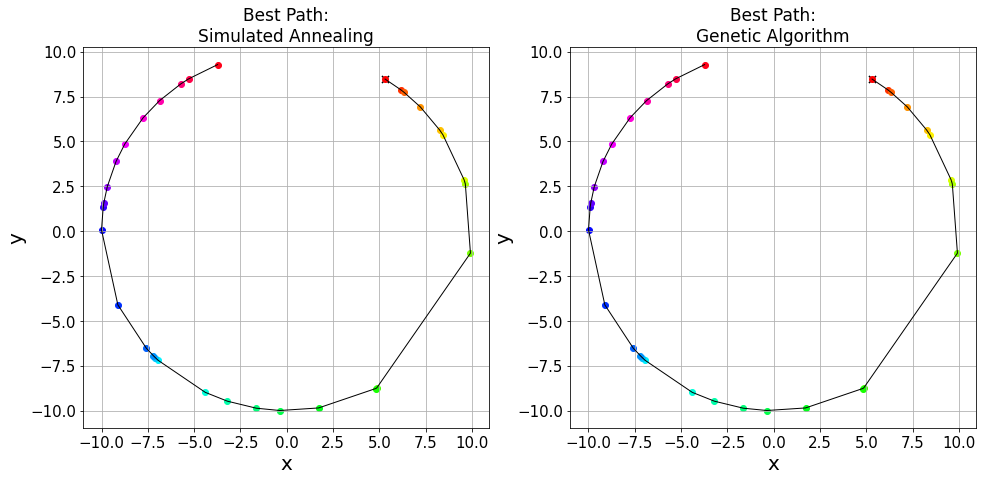

In [7]:
N=32 #Number of cities
x = np.arange(N) 
path=np.zeros((N,2))
path_GA=np.zeros((N,2))
for i in range (N):
    path[i][0] = x_coordinates_cyrcle[ int(BestPath_cyrcle[i]-1) ]
    path[i][1] = y_coordinates_cyrcle[ int(BestPath_cyrcle[i]-1) ]
    path_GA[i][0] = x_coordinates_cyrcle[ int(BestPath_cyrcle_GA[i]-1) ]
    path_GA[i][1] = y_coordinates_cyrcle[ int(BestPath_cyrcle_GA[i]-1) ]
  
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
ax1.scatter(path[0][0], path[0][1], marker = 'x',color="black",s=50)
ax1.plot(path[:,0],path[:,1],color="black",lw=1)
ax1.grid(True)
ax1.set_ylabel(f'y',fontsize=20)
ax1.set_xlabel(f'x',fontsize=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
ax1.set_title(f'Best Path:\nSimulated Annealing',  fontsize=17);

ax2.scatter(path_GA[0][0], path_GA[0][1], marker = 'x',color="black",s=50)
ax2.plot(path_GA[:,0],path_GA[:,1],color="black",lw=1)

ax2.grid(True)
# add labels for axes
ax2.set_ylabel(f'y',fontsize=20)
ax2.set_xlabel(f'x',fontsize=20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)

# add title
ax2.set_title(f'Best Path:\nGenetic Algorithm',  fontsize=17);

cmap = get_cmap(len(path))
for i in range(N):
    ax1.scatter(path[i][0], path[i][1], color=cmap(i))
    ax2.scatter(path_GA[i][0], path_GA[i][1], color=cmap(i))




The path calculated with two different methods are the same. It is a signal of the effectiviness of both algorithm.

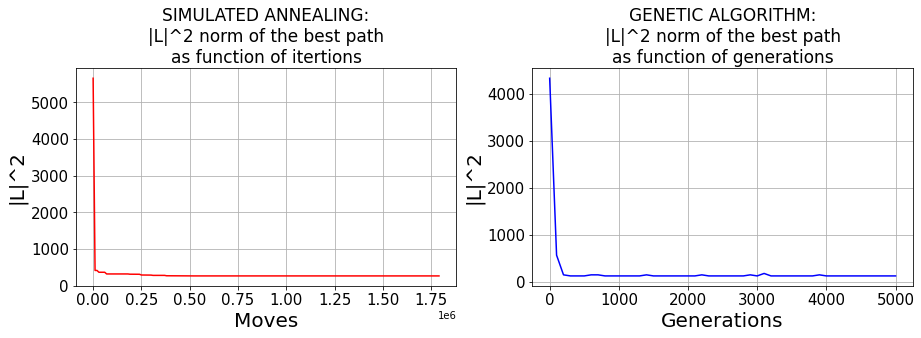

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
nstep1=500000
nstep2=300000
nstep3=1000000
M=nstep1+nstep2+nstep3 #Number of moves
L=10000  #Number steps before print
N=int(M/L) #Number of prints
x = np.arange(N)*L

ax1.plot(x,
         BestPath_Length2_cyrcle, 
         color='red'
        )

ax1.grid(True)
# add labels for axes
ax1.set_ylabel(f'|L|^2',fontsize=20)
ax1.set_xlabel(f'Moves',fontsize=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)



# add title
ax1.set_title(f'SIMULATED ANNEALING:\n|L|^2 norm of the best path\nas function of itertions',  fontsize=17);

M_GA=5000 #Number of generations
L_GA=100  #Number steps before print
N_GA=int(M_GA/L_GA) #Number of prints
x_GA = np.arange(N_GA+1)*L_GA
ax2.plot(x_GA,
         BestPath_Length2_cyrcle_GA, 
         color='blue'
        )

ax2.grid(True)
# add labels for axes
ax2.set_ylabel(f'|L|^2',fontsize=20)
ax2.set_xlabel(f'Generations',fontsize=20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)

# add title
ax2.set_title(f'GENETIC ALGORITHM:\n|L|^2 norm of the best path\nas function of generations',  fontsize=17);



When the cities are placed on the cyrcle, the differences between the length of the possible configurations are high, indeed the boltzmann weigh calculated for the configuration of the best path is clearly different from the others and the markov chain converges immediately.

### CITIES ON THE SQUARE:

In [11]:
BestPath_Length2_square = np.loadtxt(fname = "BestPath_Length2_square.txt")
BestPath_square = np.loadtxt(fname = "BestPath_square.txt")
BestPath_square_GA = np.loadtxt(fname = "BestPath_square_GA.txt")
BestPath_Length2_square_GA = np.loadtxt(fname = "BestPath_Length2_square_GA.txt")
x_coordinates_square = np.loadtxt(fname = "coordinates_square.txt",usecols=0)
y_coordinates_square = np.loadtxt(fname = "coordinates_square.txt",usecols=1)

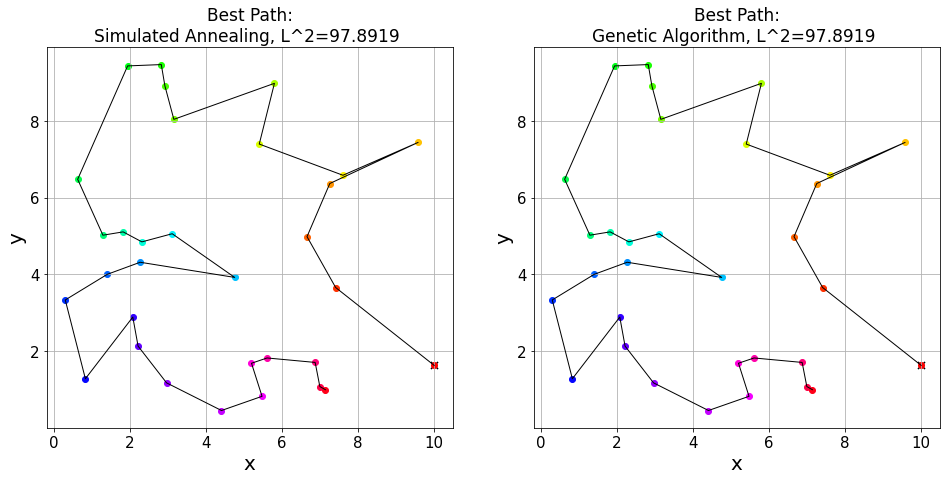

In [12]:
N=32 #Number of cities
x = np.arange(N) 
path=np.zeros((N,2))
path_GA=np.zeros((N,2))
for i in range (N):
    path[i][0] = x_coordinates_square[ int(BestPath_square[i]-1) ]
    path[i][1] = y_coordinates_square[ int(BestPath_square[i]-1) ]
    path_GA[i][0] = x_coordinates_square[ int(BestPath_square_GA[i]-1) ]
    path_GA[i][1] = y_coordinates_square[ int(BestPath_square_GA[i]-1) ]
  
    

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
ax1.scatter(path[0][0], path[0][1], marker = 'x',color="black",s=50)
ax1.plot(path[:,0],path[:,1],color="black",lw=1)

ax1.grid(True)
# add labels for axes
ax1.set_ylabel(f'y',fontsize=20)
ax1.set_xlabel(f'x',fontsize=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)

# add title
ax1.set_title(f'Best Path:\nSimulated Annealing, L^2={BestPath_Length2_square[-1]} ',  fontsize=17);

ax2.scatter(path_GA[0][0], path_GA[0][1], marker = 'x',color="black",s=50)
ax2.plot(path_GA[:,0],path_GA[:,1],color="black",lw=1)

ax2.grid(True)
# add labels for axes
ax2.set_ylabel(f'y',fontsize=20)
ax2.set_xlabel(f'x',fontsize=20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)

# add title
ax2.set_title(f'Best Path:\nGenetic Algorithm, L^2={BestPath_Length2_square_GA[-1]} ',  fontsize=17);

cmap = get_cmap(len(path))
for i in range(N):
    ax1.scatter(path[i][0], path[i][1], color=cmap(i))
    ax2.scatter(path_GA[i][0], path_GA[i][1], color=cmap(i))



180


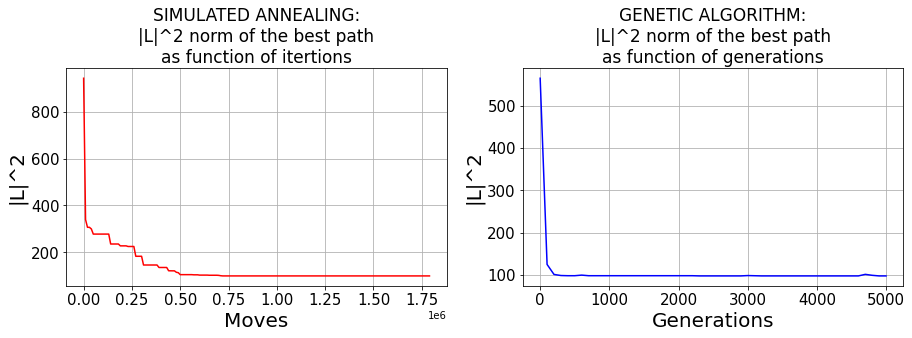

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
nstep1=500000
nstep2=300000
nstep3=1000000
M=nstep1+nstep2+nstep3 #Number of moves
L=10000  #Number steps before print
N=int(M/L) #Number of prints
print(N)
x = np.arange(N)*L

ax1.plot(x,
         BestPath_Length2_square, 
         color='red'
        )

ax1.grid(True)
# add labels for axes
ax1.set_ylabel(f'|L|^2',fontsize=20)
ax1.set_xlabel(f'Moves',fontsize=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)



# add title
ax1.set_title(f'SIMULATED ANNEALING:\n|L|^2 norm of the best path\nas function of itertions',  fontsize=17);

M_GA=5000 #Number of generations
L_GA=100  #Number steps before print
N_GA=int(M_GA/L_GA) #Number of prints
x_GA = np.arange(N_GA+1)*L_GA
ax2.plot(x_GA,
         BestPath_Length2_square_GA, 
         color='blue'
        )

ax2.grid(True)
# add labels for axes
ax2.set_ylabel(f'|L|^2',fontsize=20)
ax2.set_xlabel(f'Generations',fontsize=20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)

# add title
ax2.set_title(f'GENETIC ALGORITHM:\n|L|^2 norm of the best path\nas function of generations',  fontsize=17);




If the cities are placed randomly inside a square, it can be seen that the simulated annealing method takes more steps to converge: $7*10^5$ more or less. Indeed, if the cities are placed inside a square, there are many configuration of the path with similiar length (i.e. similar energy). This fact causes similar boltzmann weights of these paths and an high acceptance of the moves of the metropolis even at low temperatures. 

This problem brought me to choose as energy the $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ norm instead of the $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ norm. Since the length of the path built had been probably more than 1 (the side of the square is 10), the $L^{(2)}$ norm would have accentuated the differences among similar path. This is helpful to avoid configuration whose energy is similar to the ground state (i.e. the configuration of the best path).